> Arnob Dey |
> ID : 203-15-3906|
> Section : PC - B | 
> Subject: Artificial Intelligence Lab | 
> Course Code: CSE316 |

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/arnob016/PyClass/master/AI%20Lab%20Report/data.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df['Profit'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,774031.10
1,162597.70,151377.59,443898.53,California,757873.82
2,153441.51,101145.55,407934.54,Florida,662521.60
3,144372.41,118671.85,383199.62,New York,646243.88
4,142107.34,91391.77,366168.42,Florida,599667.53


In [20]:
from sklearn.tree import DecisionTreeRegressor

X = df[['R&D Spend']] 
y = df['Profit'] 

train1 = DecisionTreeRegressor(max_depth=2, random_state=1)

train1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

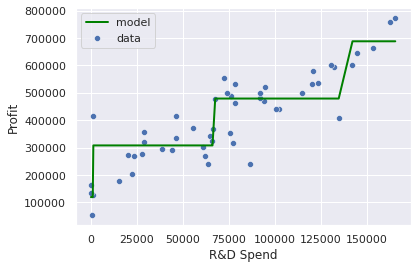

In [21]:
sns.scatterplot(x=df['R&D Spend'],
                y=df['Profit'],
                label='data')

plt.plot(df['R&D Spend'].sort_values(),       
         train1.predict(df['R&D Spend'].sort_values().to_frame()),
         color='Green', label='model',
         linewidth=2)

plt.legend()

plt.savefig('tree1.png')

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(train1, feature_names=['R&D Spend'], filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree") 

'tree.pdf'

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0, shuffle=True)

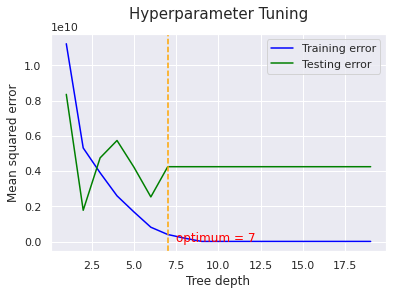

In [24]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []

for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [25]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), 'min_samples_split': range(10, 60, 10)}, cv=5,
                  n_jobs=1, scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 4, 'min_samples_split': 10}
9604135398.303028


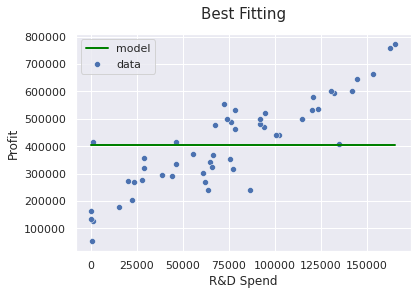

In [27]:
sns.scatterplot(x=df['R&D Spend'],
                y=df['Profit'],
                label='data')

new_model = DecisionTreeRegressor(max_depth=9,
                                  min_samples_split=50)

new_model.fit(X_train, y_train)

plt.plot(df['R&D Spend'].sort_values(),       
         new_model.predict(df['R&D Spend'].sort_values().to_frame()),
         color='green', label='model', linewidth=2)

plt.legend()
plt.title('Best Fitting', pad=15, size=15)
plt.savefig('decisiontree.png')